In [1]:
import emcee
import triangle
import corner 

In [10]:
# the logarithm of the priors
def logprior(params):
     
	"""the prior on the data states the accepted values for the params"""
    logp = scipy.stats.uniform.logpdf(params[0], 1.0, 2.0)
    logp = logp + scipy.stats.uniform.logpdf(params[1],0.3,0.8)
    return logp 

def logposterior(params, mag1, colour):
    #log(likelihood) + log(prior)
    return loglikelihood(params, mag1, colour) + logprior(params)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [12]:
def logprior(params):
	"""the prior on the data states the accepted values for the params"""
    logp = scipy.stats.uniform.logpdf(params[0], 1.0, 2.0)
    logp = logp + scipy.stats.uniform.logpdf(params[1],0.3,0.8)
    return logp 

def logposterior(params, paramsLF, namef, ext, data, thind, thickd):
    #log(likelihood) + log(prior)
    return fcn2min(params, paramsLF, namef, ext, data) + logprior(params)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [5]:
p0 = np.array([1,2])
#logpp = logprior(p0)
ndim = len(p0)
sigs = np.array([0.2, 0.1]) 
nwalkers = 50 # number of points in the Ensemble, should be at least twice the number of parameters
niterations = 1000
p0s = emcee.utils.sample_ball(p0, sigs, nwalkers) #p0 is a guess
# initialize the ball of initial conditions
sampler = emcee.EnsembleSampler(nwalkers, ndim, loglikelihood,threads  = 5, args= (p0, mag1, colour))
burnin = 100
pos, lnprob, state = sampler.run_mcmc(p0s, burnin)
sampler.reset()
pos, lnprob, state = sampler.run_mcmc(pos, niterations)
print('Acceptance ratio', sampler.acceptance_fraction)
                                      


SyntaxError: invalid syntax (3258187547.py, line 8)

In [ ]:
corner.corner(sampler.chain[0, :500, :], bins=10, labels = ['a', 'b'], truths = [1.2, 2.1], quantiles = [0.16, 0.5, 0.84])

In [13]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

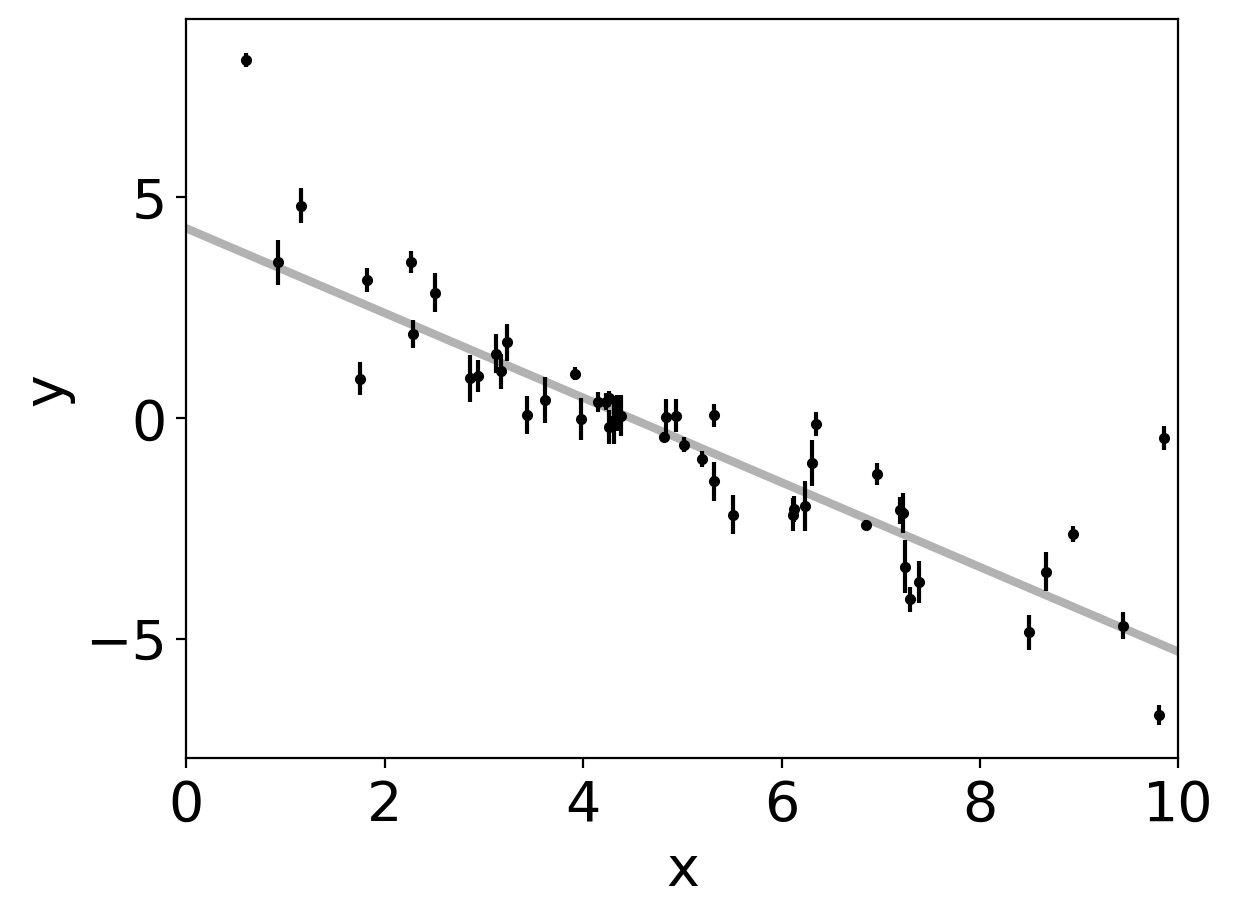

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594   #ture slope 真实斜率
b_true = 4.294  #true inter cept 真实截距
f_true = 0.534 #生成数据时使用的噪声因子的真实值

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)  #将这些随机数乘以 0.5 并加上 0.1，得到 y 值的误差项 yerr，在 [0.1, 0.6) 区间内。
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


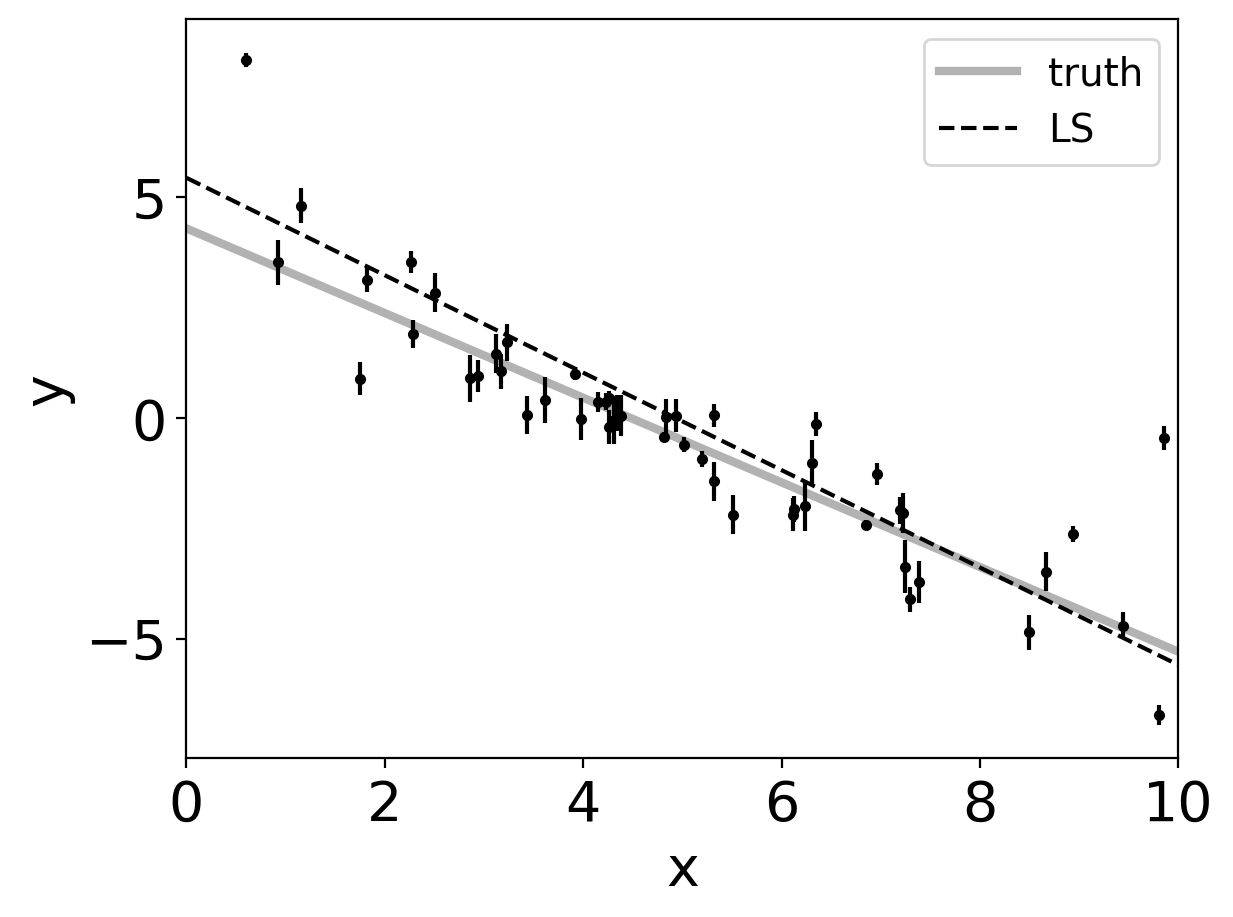

In [15]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [16]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))   #乘以 -0.5 以符合正态分布对数似然的标准形式

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


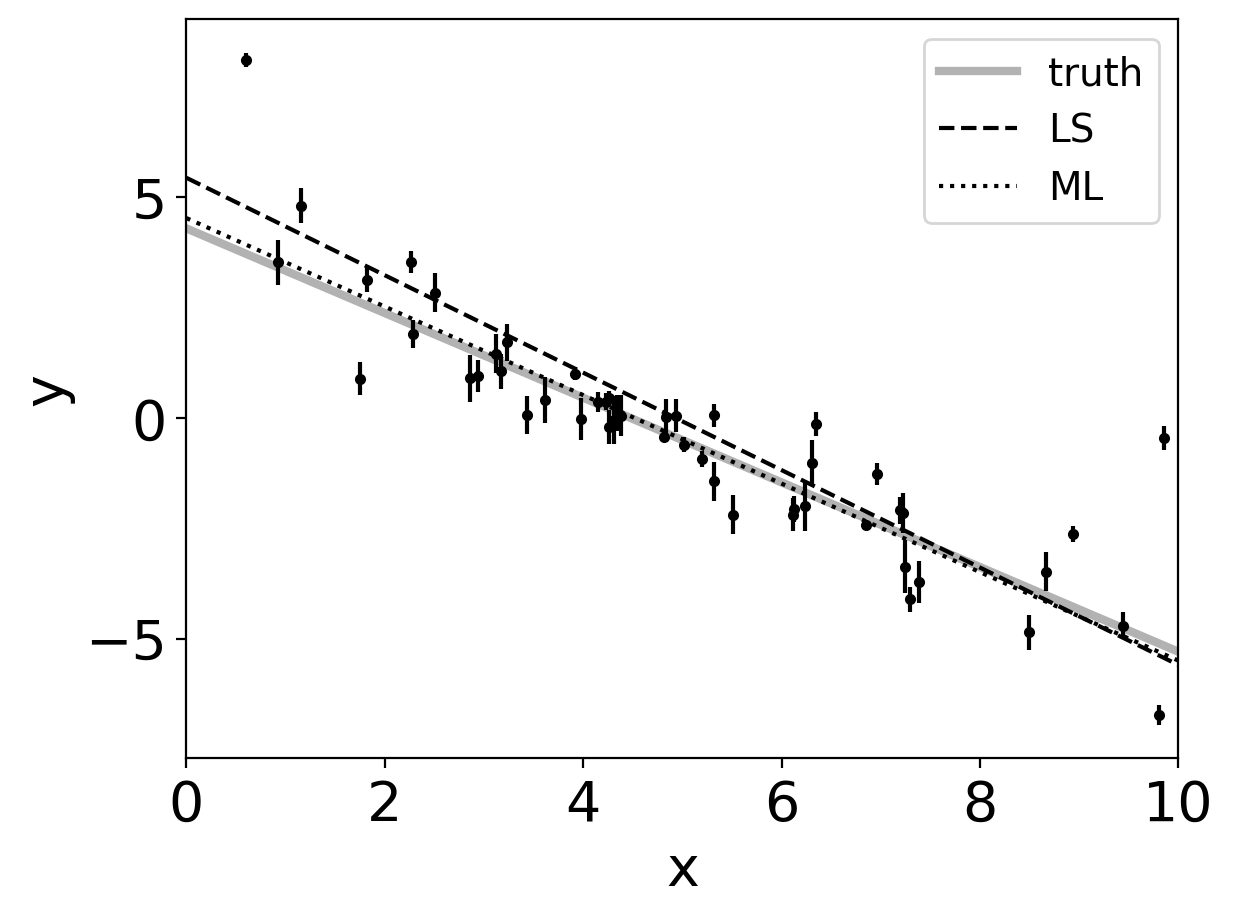

In [17]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [18]:
def log_prior(theta):
    m, b, log_f = theta
    if 2 < param1 < 4 and 1 < param2 < 5 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

In [19]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [20]:
import emcee

#pos = soln.x + 1e-4 * np.random.randn(32, 3)

nwalkers = 100
param1 = np.random.uniform(low =2, high=4, size = nwalkers)
param2 = np.random.normal(loc = fit_parms[1], scale = 0.1, size =nwalkers)
pos = np.vstack((param1, param2)) #nwalkers x ndim 100 values at step 0

nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(radius))

sampler.run_mcmc(pos, 5000, progress=True)
#will compute p0s for each step 

100%|██████████| 5000/5000 [00:03<00:00, 1384.30it/s]


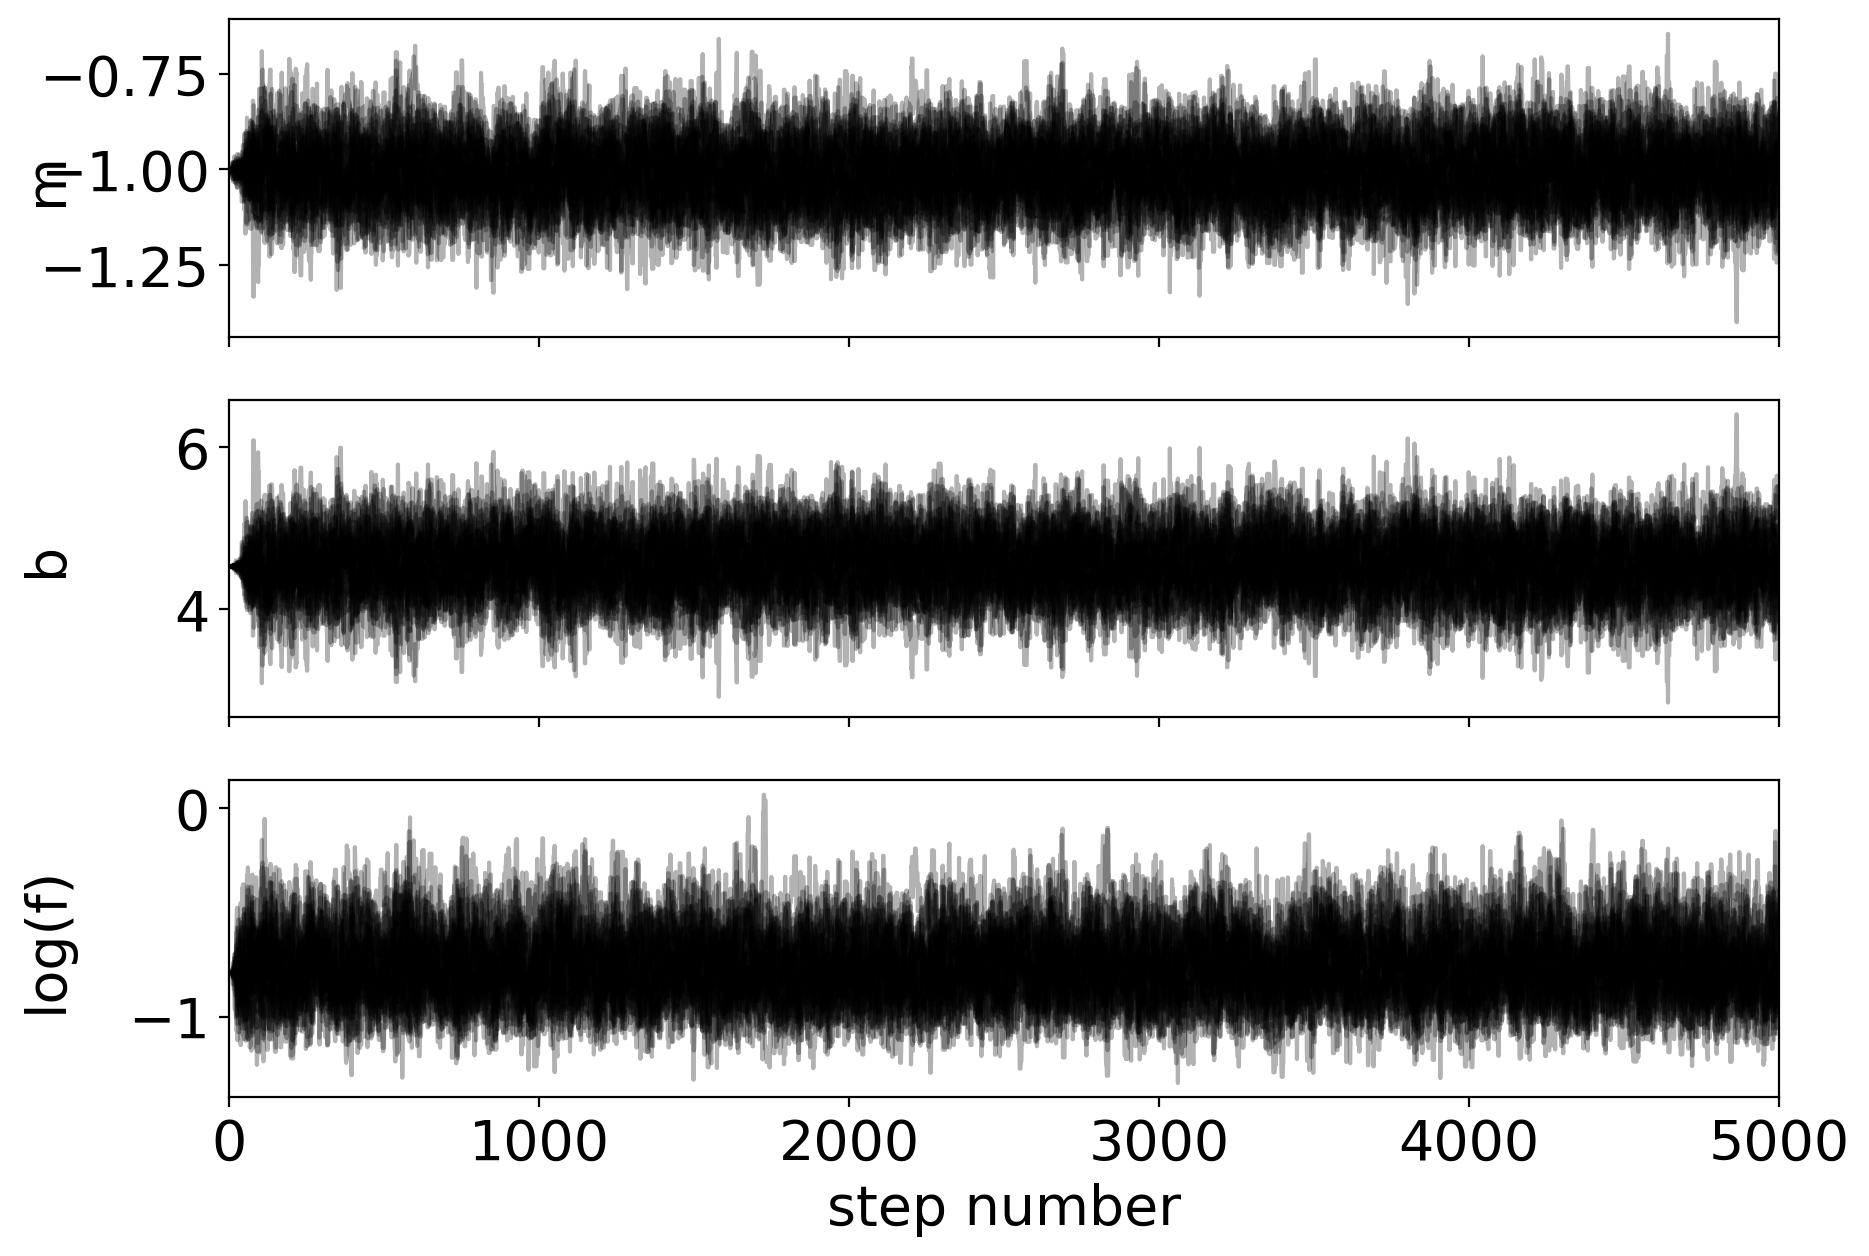

In [21]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [22]:
tau = sampler.get_autocorr_time()
print(tau)

[37.45030416 37.77043138 40.20149335]


In [23]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


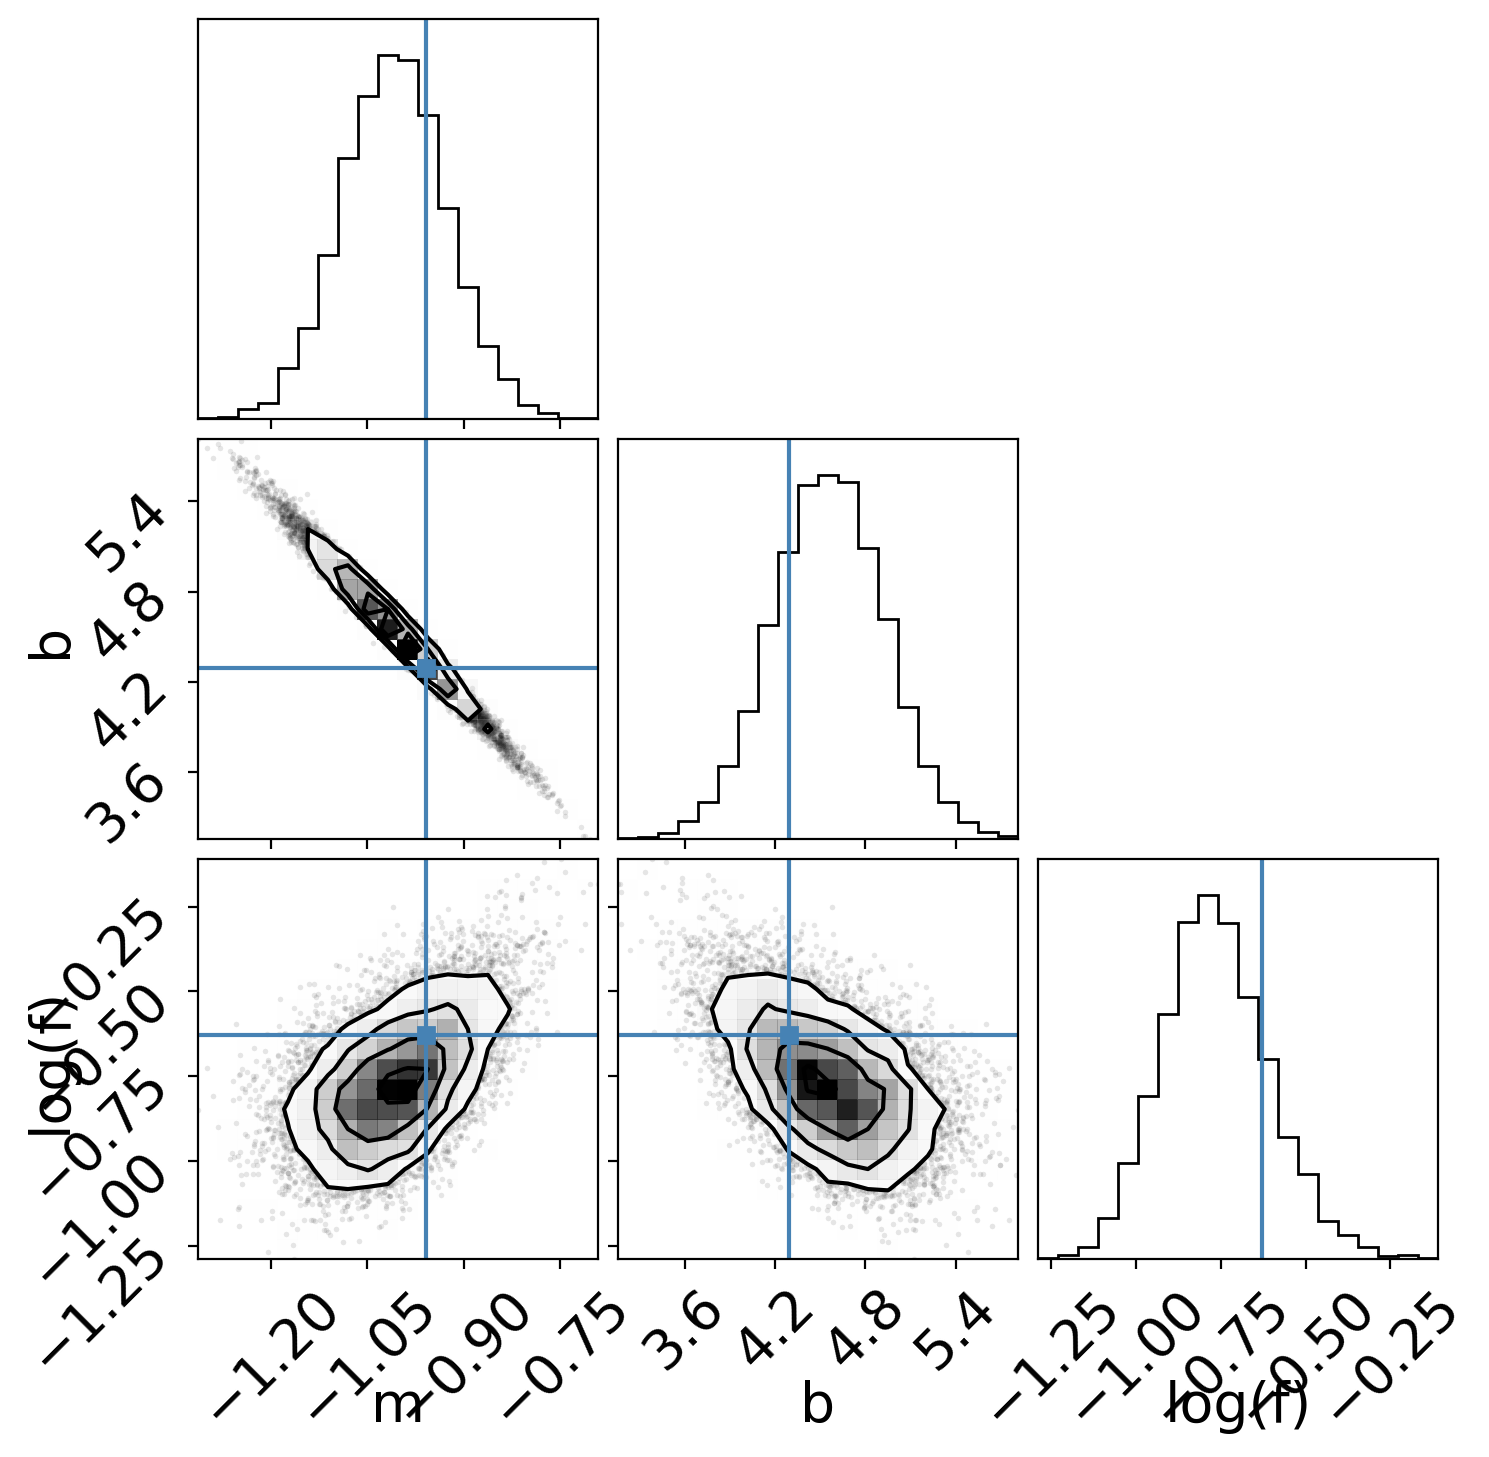

In [24]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
);

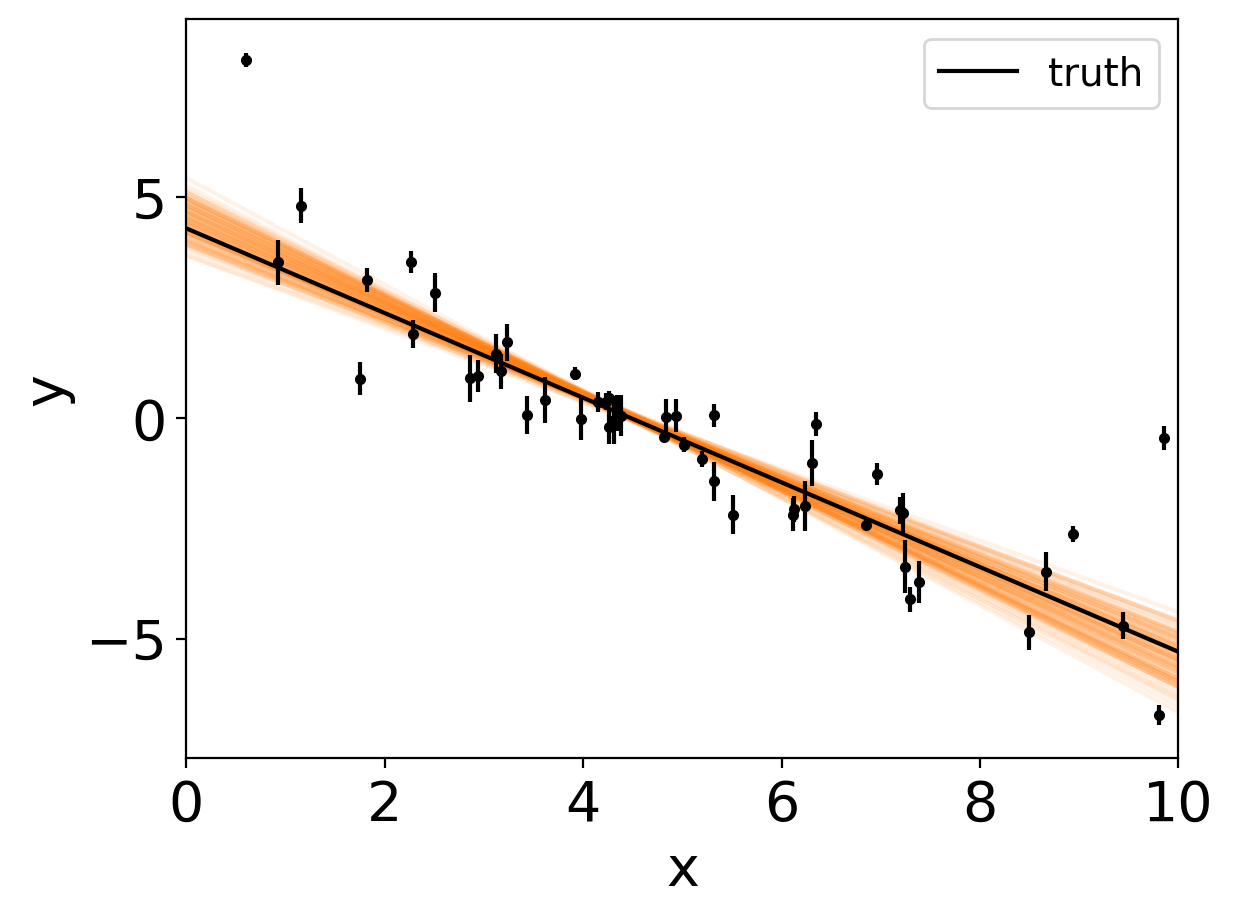

In [25]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [26]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
import emcee
import numpy as np

np.random.seed(42)


# The definition of the log probability function
# We'll also use the "blobs" feature to track the "log prior" for each step
def log_prob(theta):
    log_prior = -0.5 * np.sum((theta - 1.0) ** 2 / 100.0)
    log_prob = -0.5 * np.sum(theta**2) + log_prior
    return log_prob, log_prior


# Initialize the walkers
coords = np.random.randn(32, 5)  #初始化32个步行者，每个步行者有5个维度（参数）
nwalkers, ndim = coords.shape

# Set up the backend
# Don't forget to clear it in case the file already exists
filename = "tutorial.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, backend=backend)

In [3]:
max_n = 100000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(coords, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 100:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1

    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

  6%|▌         | 5900/100000 [01:09<18:22, 85.32it/s]


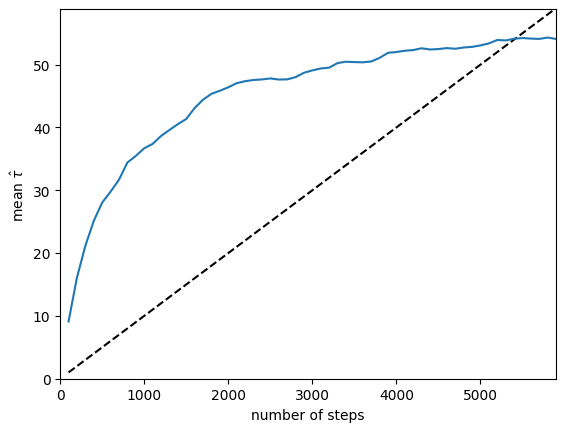

In [4]:
import matplotlib.pyplot as plt

n = 100 * np.arange(1, index + 1)
y = autocorr[:index]
plt.plot(n, n / 100.0, "--k")
plt.plot(n, y)
plt.xlim(0, n.max())
plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$");

burn-in: 117
thin: 24
flat chain shape: (7680, 5)
flat log prob shape: (7680,)
flat log prior shape: (7680,)


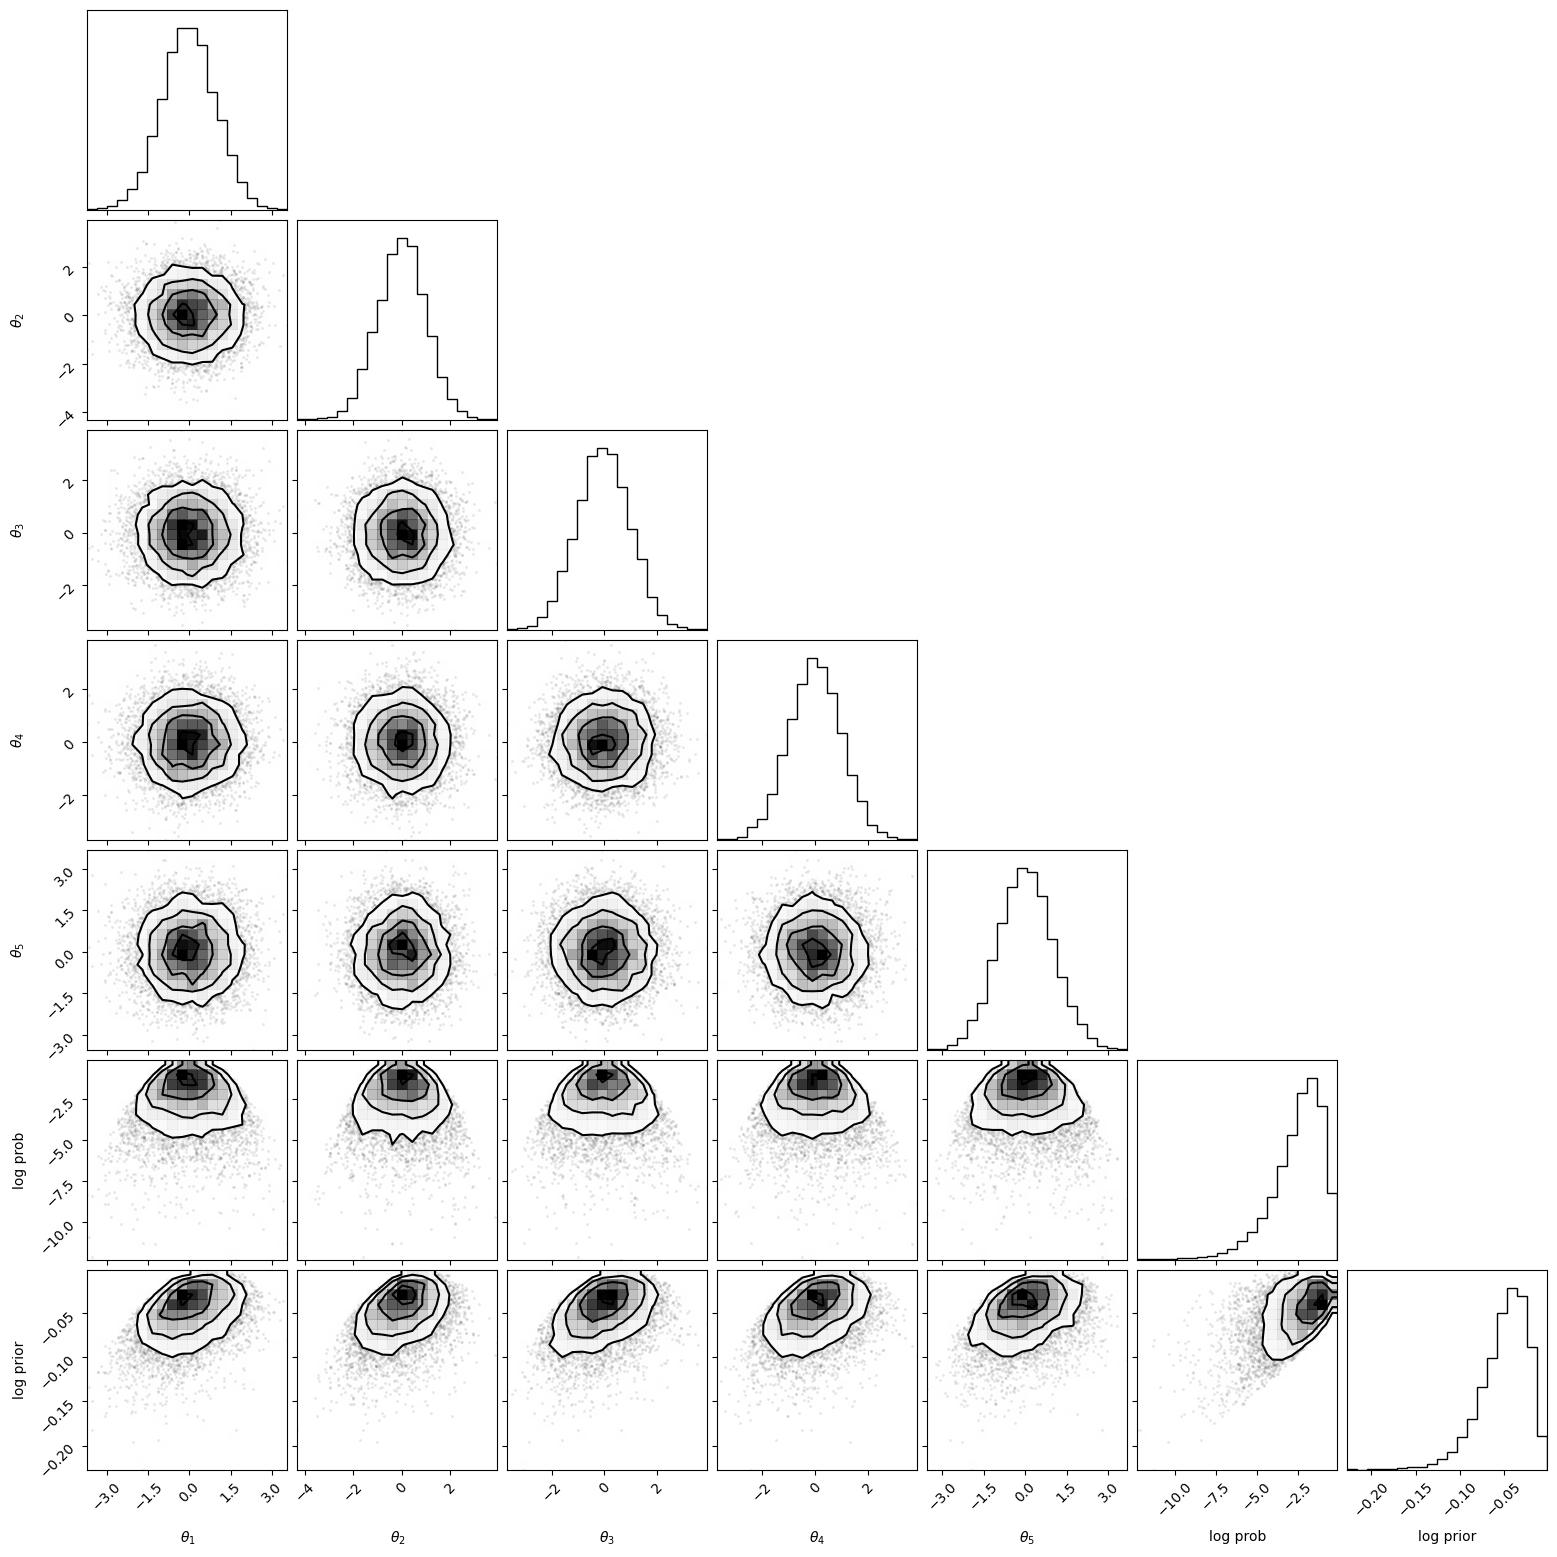

In [5]:
import corner

tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = sampler.get_chain(discard=burnin, flat=True, thin=thin)
log_prob_samples = sampler.get_log_prob(discard=burnin, flat=True, thin=thin)
log_prior_samples = sampler.get_blobs(discard=burnin, flat=True, thin=thin)

print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))
print("flat log prior shape: {0}".format(log_prior_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None], log_prior_samples[:, None]), axis=1
)

labels = list(map(r"$\theta_{{{0}}}$".format, range(1, ndim + 1)))
labels += ["log prob", "log prior"]

corner.corner(all_samples, labels=labels);